Polinomal Regresyon: Birden fazla değişkene ve üslerine sahip olan regresyon çeşididir.Bazen, veriler arasında doğrusal olmayan bir ilişki olabilir. Böyle bir ilişkiyi açıklamaya çalışmanın bir yolu, bir polinom regresyon modelidir.

In [30]:
#Kütüphaneleri import edelim
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [31]:
veriler = pd.read_csv("maaslar.csv")
print(veriler)

              unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000


In [32]:
x=veriler.iloc[:,1:2] # kullanacağımız verielri ayırdık
y=veriler.iloc[:,2:]
X = x.values
Y = y.values #Ayırdığımız verileri numpyy array yaptık
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[ 2250]
 [ 2500]
 [ 3000]
 [ 4000]
 [ 5500]
 [ 7500]
 [10000]
 [15000]
 [25000]
 [50000]]


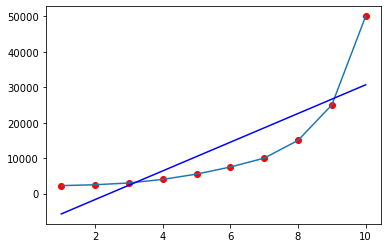

In [33]:
from sklearn.linear_model import LinearRegression #ilk olarak lineer bir model oluşturduk. Bu işlemle modelimizi eğitiyoruz
lin_reg = LinearRegression()
lin_reg.fit(X,Y) #x den y yi öğren diyoruz
plt.scatter(X,Y,color='red')
plt.plot(X,Y)
plt.plot(X,lin_reg.predict(X),color='blue')

Polinomal regresyon analizi ile amaç elimizde bulunan data setinden bir lineer model oluşturup görselleştirdikten sonra bu çıktılara uygun lineer modeli elde etmek.
Scatter nedir ? İki farklı değişkenin arasındaki ilişkiyi belirlemek için kullanılır. Aralarındaki ilişkinin sebebi görülemese de, ilgili iki değişkenin arasında direkt olarak bir ilişki bulunup bulunmadığı ve bu ilişkinin ne derece güçlü olduğu görülebilir.

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


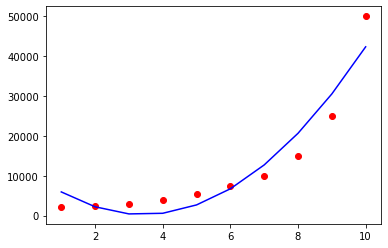

In [34]:
""" POLİNOMAL REGRESYON ANALİZİ"""
from sklearn.preprocessing import PolynomialFeatures #polynomialFeatures aslında bize herhangi bir sayıyı polinomial olarak ifade etmemizi sağlar
poly_reg = PolynomialFeatures(degree = 2)
#2.dereceden bir obje oluşturduk 

x_poly = poly_reg.fit_transform(X)
print(x_poly)

from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()

lin_reg2.fit(x_poly,Y)
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.show()


In [35]:
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))

[[56091.66666667]]
[[10083.33333333]]


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


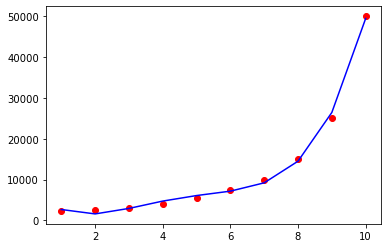

In [36]:

"""4.dereceden deneme"""
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
#4.dereceden

x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,Y)
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.show()

In [37]:
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))


[[89041.66666667]]
[[8146.9948718]]


[0.01150915]
[0.01150915]


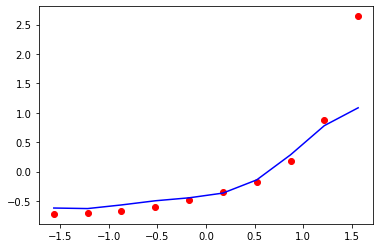

In [38]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()

x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))


from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')


print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))